In [1]:
###%matplotlib inline

import numpy
import pylab

In [2]:
fps = 30
period = int(numpy.floor(1000./fps))
print period

33


In [70]:
prev_t = 9
w_b = 1
n_b = period/w_b
end_t = 4*period
max_val = period
prev_h = period - prev_t
now_t = numpy.arange(period, end_t)
diff_t = now_t - (prev_t - prev_h*w_b)
n_h_now = numpy.floor(n_b - numpy.mod(diff_t, period)/w_b)

fig_linear = pylab.figure()
ax = fig_linear.add_subplot(111)
#ax.text(2, 6, r'an equation: $E=mc^2$', fontsize=15)
ax.text(20, 6, 'invalid\ntime', fontsize=12, horizontalalignment='center')
ax.text(prev_t+13, prev_h+1., 'previous\nspike\n(%d, %d)'%(prev_t, prev_h), fontsize=12, horizontalalignment='center')
ax.annotate('', xy=(prev_t, prev_h), xytext=(prev_t+8, prev_h+2),
            horizontalalignment='center',
            verticalalignment='center',
            arrowprops=dict(arrowstyle="->", connectionstyle="arc3"))
axes = pylab.gca()
axes.set_ylim([0,max_val + 8])
pylab.bar(prev_t, max_val, period - prev_t, color=(1., 0., 0., 0.3), linewidth=0.)
pylab.plot([0, end_t], [max_val, max_val], 'b--', label=r'Maximum $H$ multiple')
pylab.plot([prev_t, prev_t], [0, max_val], '-.k')
pylab.plot([0, end_t], [prev_h, prev_h], '-.k')
pylab.plot([prev_t], [prev_h], 'sk', markerfacecolor='white')
pylab.plot(now_t, n_h_now, 'g', label=r'Possible $H$ multiples')
pylab.legend()
pylab.xlabel("Time (ms)")
pylab.ylabel(r'$H\cdot f(t_{now})$')
pylab.show()

In [78]:
prev_t = 9
n_b = 8
w_b = float(period)/float(n_b)
print w_b
print n_b
max_h = 2**(n_b - 1)
end_t = 4*period
prev_h = 2**( numpy.floor( n_b - prev_t/w_b) )
now_t = numpy.arange(period, end_t)
diff_t = now_t - (prev_t - numpy.log2(prev_h)*w_b) + 0.0001
print diff_t
mod_diff_t = numpy.mod(diff_t, period)
print mod_diff_t
print mod_diff_t/w_b
n_bits_now = numpy.floor( n_b - mod_diff_t/w_b) 
print n_bits_now
h_now = 2**(n_bits_now)
#n_h_now = 2**( numpy.floor(n_b - diff_t/w_b) )

fig_exp = pylab.figure(figsize=(10,6))
ax = fig_exp.add_subplot(111)
#ax.text(2, 6, r'an equation: $E=mc^2$', fontsize=15)
ax.text(20, 6, 'invalid\ntime', fontsize=12, horizontalalignment='center')
ax.text(prev_t+13, prev_h+1., 'previous\nspike\n(%d, %d)'%(prev_t, prev_h), fontsize=12, horizontalalignment='center')
ax.annotate('', xy=(prev_t, prev_h), xytext=(prev_t+8, prev_h+2),
            horizontalalignment='center',
            verticalalignment='center',
            arrowprops=dict(arrowstyle="->", connectionstyle="arc3"))
axes = pylab.gca()
axes.set_ylim([0,max_h + 30])
pylab.bar(prev_t, max_h, period - prev_t, color=(1., 0., 0., 0.3), linewidth=0.)
pylab.plot([0, end_t], [max_h, max_h], 'b--', label=r'Maximum $H$ multiple')
pylab.plot([prev_t, prev_t], [0, 2**n_b], '-.k')
pylab.plot([0, end_t], [prev_h, prev_h], '-.k')
pylab.plot([prev_t], [prev_h], 'sk', markerfacecolor='white')
pylab.plot(now_t, h_now, 'g', label=r'Possible $H$ multiples')
pylab.legend()
pylab.xlabel("Time (ms)")
pylab.ylabel(r'$2^{f(t_{now})}H$')
pylab.show()

4.125
8
[  44.6251   45.6251   46.6251   47.6251   48.6251   49.6251   50.6251
   51.6251   52.6251   53.6251   54.6251   55.6251   56.6251   57.6251
   58.6251   59.6251   60.6251   61.6251   62.6251   63.6251   64.6251
   65.6251   66.6251   67.6251   68.6251   69.6251   70.6251   71.6251
   72.6251   73.6251   74.6251   75.6251   76.6251   77.6251   78.6251
   79.6251   80.6251   81.6251   82.6251   83.6251   84.6251   85.6251
   86.6251   87.6251   88.6251   89.6251   90.6251   91.6251   92.6251
   93.6251   94.6251   95.6251   96.6251   97.6251   98.6251   99.6251
  100.6251  101.6251  102.6251  103.6251  104.6251  105.6251  106.6251
  107.6251  108.6251  109.6251  110.6251  111.6251  112.6251  113.6251
  114.6251  115.6251  116.6251  117.6251  118.6251  119.6251  120.6251
  121.6251  122.6251  123.6251  124.6251  125.6251  126.6251  127.6251
  128.6251  129.6251  130.6251  131.6251  132.6251  133.6251  134.6251
  135.6251  136.6251  137.6251  138.6251  139.6251  140.6251  141.625

5.5
[ 1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24 25
 26 27 28 29 30 31 32 33]
[ 0.18181818  0.36363636  0.54545455  0.72727273  0.90909091  1.09090909
  1.27272727  1.45454545  1.63636364  1.81818182  2.          2.18181818
  2.36363636  2.54545455  2.72727273  2.90909091  3.09090909  3.27272727
  3.45454545  3.63636364  3.81818182  4.          4.18181818  4.36363636
  4.54545455  4.72727273  4.90909091  5.09090909  5.27272727  5.45454545
  5.63636364  5.81818182  6.        ]
[ 32.  32.  32.  32.  32.  16.  16.  16.  16.  16.  16.   8.   8.   8.   8.
   8.   4.   4.   4.   4.   4.   4.   2.   2.   2.   2.   2.   1.   1.   1.
   1.   1.   1.]


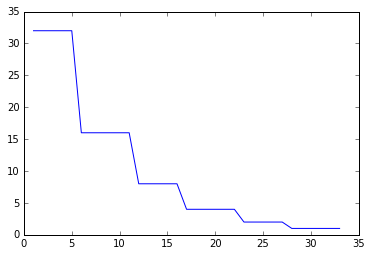

In [168]:
w_b = (float(period)/float(n_b))
print w_b
t_range = numpy.arange(1, period + 1)
print t_range
print t_range/w_b
h_range = 2**numpy.floor(n_b - t_range/w_b)
print h_range
fig_range = pylab.figure()
pylab.plot(t_range, h_range)
pylab.show()